# ATLAS Hub: Computing and visualizing linear trends

We build on the climate4R framework, a set of R libraries especifically developed for the tasks of loading, processing and manipulation of climate data. For more information regarding this framework and its installation, we refer the reader to the [GitHub repository](https://github.com/SantanderMetGroup/climate4R) that provides all the information necessary.

In [1]:
library(loadeR) # C4R
library(transformeR) # C4R
library(visualizeR) # C4R
library(geoprocessoR) # C4R
library(climate4R.indices) # C4R

library(magrittr) # The package magrittr is used to pipe (%>%) sequences of data operations improving readability
library(sp) # plotting functionalities
library(RColorBrewer)  # plotting functionalities e.g., color palettes
library(rgdal)

Loading required package: rJava

Loading required package: loadeR.java

Java version 1.8x amd64 by JetBrains s.r.o detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.0 (2020-07-31) is loaded

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.0 (2020-09-18) is loaded

Please use 'citation("loadeR")' to cite this package.




    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.0.2 (2020-09-02) is loaded


Development version may have an unexpected behaviour

Please see 'citation("transformeR")' to cite this package.

Warning message:
“no DISPLAY variable so Tk is not available”
visualizeR version 1.6.0 (2020-05-23) is loaded

Please see 'citation("visualizeR")' to cite this package.

geoprocessoR version 0.2.0 (2020-01-06) is loaded

Please see 'citation("geoprocessoR")' to cite this package.

climate4R.indices version 0.1.0 (2019-10-08) is loaded

Use 'indexShow()' for an overview of the available climate indices and circIndexShow() for the circulation indices.

NOTE: use package climate4R.climdex to calculate ETCCDI indices.


Attaching package: ‘climate4R.indices’


The following object is masked from ‘package:transformeR’:

    lambWT


rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.1, released 2019/06/28
Path to GDAL shared files: /op

In [2]:
C4R.vocabulary()

identifier,standard_name,units
<fct>,<fct>,<fct>
hurs,2-meter relative humidity,%
hursmax,maximum 2-meter relative humidity,%
hursmin,minimum 2-meter relative humidity,%
huss,2-meter specific humidity,kg.kg-1
hussmax,maximum 2-meter specific humidity,kg.kg-1
hussmin,minimum 2-meter specific humidity,kg.kg-1
lm,land binary mask,1
orog,surface altitude,m
ps,air pressure at surface level,Pa


### Parameters defined by the user


In [31]:
# Parameters for downloading data
var <- "" # Variable names; type C4R.vocabulary() for name coding
latLim <- c(12,74) # Latitude boundaries
lonLim <- c(-170,-50) # Longitude boundaries
years <- 1980:2014 # temporal period;
season <- 1 # Season (Januray in this example)
temporalAggregationFunction <- "sum" # How shall we aggregate daily data to a monthly resolution? Consider changing to "mean" if var = "tas" (temperature)

# Parameters for plotting figures
colorScale_climatology <- seq(0, 300, 25)
colorScale_trends <- seq(-5, 5, 1)

### Load data stored in the Atlas hub
To load data stored in the Atlas hub (similar to loading data from a local directory), we rely on the C4R library called `climate4R.hub`, that contains 2 main functions: `HUB.datasets` and `loadHubData`.

*** NOTE: We should be working on the Atlas hub for these chunks of code to work. ***

On the one hand, `HUB.datasets` lists all the datasets accessible from the Atlas Hub.

In [4]:
# devtools::install_github("SantanderMetGroup/climate4R.hub") # Uncomment this line to install climate4R.hub
library(climate4R.hub)
HUB.datasets()

climate4R.hub version 0.0.0 (2020-12-03) is loaded

Please use 'citation("climate4R.hub")' to cite this package.

Warning this package is only to work in the Atlas hub

Label names are returned, set argument full.info = TRUE to get more information



$OBSERVATIONS
[1] "E-OBS_v21e_0.10regular" "E-OBS_v21e_0.25regular" "Daymet_v3_0.25regular"

We see how, to-date, only Daymet and E-OBS datasets are available from the Atlas Hub (more coming). For example, to load Daymet we just input the Daymet label to the `dataset` argument in `loadHubData` (which contains the same arguments than `loadGridData`)

In [15]:
# takes a few minutes to download...
grid <- loadHubData(dataset = "Daymet_v3_0.25regular", 
                    var = var, # replace "pr" for "tas" to download surface temperature. Type C4R.vocabulary() for more information regarding the code of the variables
                    latLim = latLim,
                    lonLim = lonLim,
                    season = season,
                    years = years,
                    aggr.m = temporalAggregationFunction) 

[2020-12-09 13:57:22] Defining harmonization parameters for variable "pr"

[2020-12-09 13:57:22] Defining geo-location parameters

[2020-12-09 13:57:23] Defining time selection parameters

NOTE: Daily data will be monthly aggregated

[2020-12-09 13:57:23] Retrieving data subset ...

[2020-12-09 14:04:57] Done



We can take a look at the metadata of the C4R object by typing `str(grid)`.

In [16]:
str(grid)

List of 4
 $ Variable:List of 2
  ..$ varName: chr "pr"
  ..$ level  : NULL
  ..- attr(*, "use_dictionary")= logi TRUE
  ..- attr(*, "description")= chr "Daily total precipitation in millimeters per day, sum of all forms converted to water-equivalent. Precipitation"| __truncated__
  ..- attr(*, "units")= chr "mm"
  ..- attr(*, "longname")= chr "total precipitation amount"
  ..- attr(*, "daily_agg_cellfun")= chr "none"
  ..- attr(*, "monthly_agg_cellfun")= chr "sum"
  ..- attr(*, "verification_time")= chr "none"
 $ Data    : num [1:35, 1:249, 1:481] NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
  ..- attr(*, "dimensions")= chr [1:3] "time" "lat" "lon"
 $ xyCoords:List of 2
  ..$ x: num [1:481] -170 -170 -170 -169 -169 ...
  ..$ y: num [1:249] 12 12.2 12.5 12.8 13 ...
  ..- attr(*, "projection")= chr "LatLonProjection"
  ..- attr(*, "resX")= num 0.25
  ..- attr(*, "resY")= num 0.25
 $ Dates   :List of 2
  ..$ start: chr [1:35] "1980-01-01 GMT" "1981-01-01 GMT" "1982-01-01 GMT" "1983-01-01 

### Working with loaded data

We compute the climatology by calling the `climatology` function and then use `spatialPlot` from library `visualizeR` to depict it. We introduce the IPCC regions of interest in the `sp.layout` argument.

[2020-12-09 14:14:23] - Computing climatology...

[2020-12-09 14:14:25] - Done.



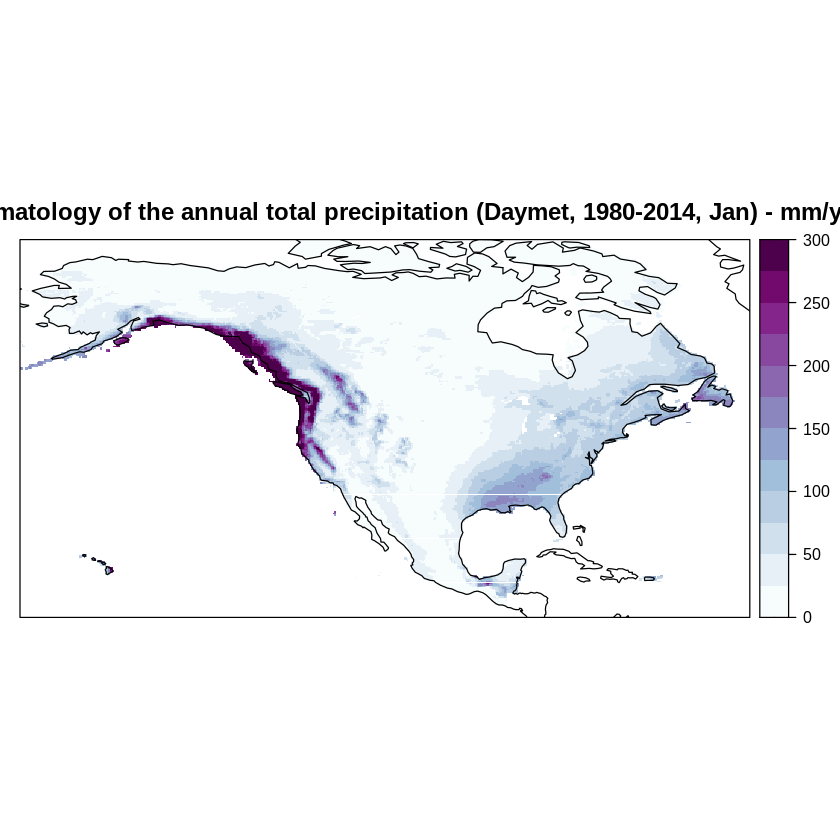

In [28]:
# pdf("climatology.pdf") ## Uncomment to save the figure
spatialPlot(climatology(grid),
            at = colorScale_climatology, 
            set.min = colorScale_climatology[1],
            set.max = colorScale_climatology[length(colorScale_climatology)],
            backdrop.theme = "coastline",
            col.regions = brewer.pal(n = 9, "BuPu") %>% colorRampPalette(),
            main = paste("Climatology of the annual total precipitation (Daymet, 1980-2014, Jan) - mm/year")) 
# dev.off() ## Uncomment to save the figure

We call the function `linearTrend` that computes the linear points at gridbox level and returns all the involved statistics (e.g., p-value of the estimated slope). We subset the slope ("b") and the p-value ("pval") among all the statistics returned, by calling `subsetGrid`. 

In [29]:
trendGrid <- linearTrend(grid, p = 0.9) %>% subsetGrid(var = "b")
# library(loadeR.2nc) # uncomment to save the trends as netCDF files
# grid2nc(trendGrid, NetCDFOutFile = "trends.nc4") # uncomment to save the trends as netCDF files

The slope of the linear trend is estimated based on the temporal resolution of the data. Please consider using the function aggregateGrid prior to the call of linearTrend to adequate the data to your resolution of interest.

[2020-12-09 14:14:30] - Computing climatology...

[2020-12-09 14:14:31] - Done.

Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in cor(Ec[, 1], Ec[, 2]):
“the standard deviation is zero”
Warning message in 

We rely on `spatialPlot` from visualizeR, to depict the trend maps and include the p-value as hatching as a member of the `sp.layout` list.

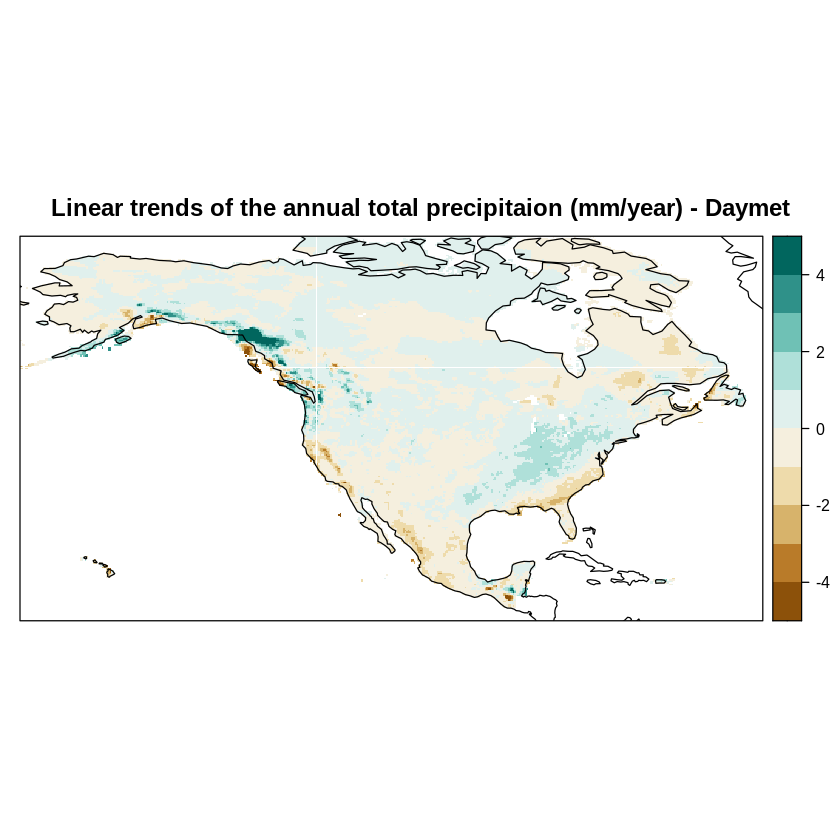

In [33]:
spatialPlot(trendGrid, 
            backdrop.theme = "coastline",
            col.regions = brewer.pal(n = 9, "BrBG") %>% colorRampPalette(),
            at = colorScale_trends, 
            set.min = colorScale_trends[1],
            set.max = colorScale_trends[length(colorScale_trends)],
            main = paste("Linear trends of the annual total precipitaion (mm/year) - Daymet"))